# Tutorial 4: Auto regression

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

We start with the same model as in the previous tutorial.

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Reduce the number of epochs to 5 for faster training
EPOCHS = 10

# Model and prediction
m = NeuralProphet(
    epochs=EPOCHS,
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': 'b68a6bd1-fb95-4c36-a90a-7338497d1eb5',
              'x': array([datetime.datetime(2014, 12, 31, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 2, 0, 0), ...,
                          datetime.datetime(2018, 12, 28, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'y': array([62.5401001 , 62.63336945, 62.25947571, ..., 72.98867035, 65.16283417,
                          72.51755524])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'n

To better understand what the remaining mismatch between our model and the real data is, we can look at the residuals. The residuals are the difference between the model's prediction and the real data. If the model is perfect, the residuals should be zero.

In [2]:
df_residuals = pd.DataFrame({
    "ds": df["ds"],
    "residuals": df["y"] - forecast["yhat1"]
})
df_residuals.plot(x="ds", y="residuals", backend="plotly")

FigureWidgetResampler({
    'data': [{'hovertemplate': 'ds=%{x}<br>residuals=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b>  <i style="color:#fc9944">~1D</i>',
              'showlegend': False,
              'type': 'scattergl',
              'uid': 'de7c8076-4478-4af0-aa20-5a9b06bd8612',
              'x': array([datetime.datetime(2014, 12, 31, 0, 0),
                          datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 2, 0, 0), ...,
                          datetime.datetime(2018, 12, 28, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 2.8698999 , -0.54336945,  7.18052429, ...,

Let us explore what a good value for the autoregression would be. Create a autocorrelation chart.

In [3]:
# TODO: Make sure statsmodels is installed

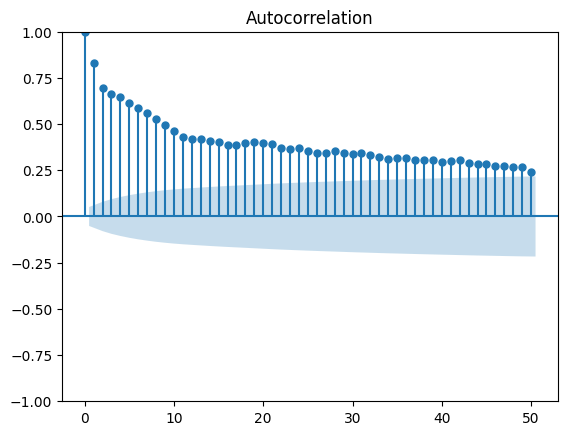

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals["residuals"], lags=50)

Now we add autoregression to our model with the `n_lags` parameter.

In [5]:

# Model and prediction
m = NeuralProphet(
    epochs=EPOCHS,
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': '212d3bdb-2b87-4e11-b1a9-15f26a93b1b2',
              'x': array([datetime.datetime(2015, 1, 10, 0, 0),
                          datetime.datetime(2015, 1, 11, 0, 0),
                          datetime.datetime(2015, 1, 12, 0, 0), ...,
                          datetime.datetime(2018, 12, 28, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'y': array([68.19343567, 73.95585632, 74.15554047, ..., 69.62485504, 58.561203  ,
                          69.72975922])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              '

As we can see the forecasting model does not fit the data very well. Feel free to explore how different numbers of lags `n_lags` affect the model.

In [6]:
m.plot_parameters(components=["autoregression"])

FigureWidgetResampler({
    'data': [{'marker': {'color': '#2d92ff'},
              'name': 'AR',
              'type': 'bar',
              'uid': '5eb069d2-a4e9-41f8-ae6d-a50cfd527f12',
              'x': array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
              'xaxis': 'x',
              'y': array([0.0283139 , 0.1186402 , 0.06924745, 0.17499344, 0.07030995, 0.02271263,
                          0.15422833, 0.2394326 , 0.03831573, 0.08380585], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermode': 'x unified',
               'margin': {'b': 0, 'l': 0, 'pad': 0, 'r': 10, 't': 10},
               'showlegend': False,
               'template': '...',
               'title': {'font': {'size': 12}},
               'width': 700,
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'linewidth': 1.5,
        

In [7]:
m.plot_components(forecast, components=["autoregression"])

FigureWidgetResampler({
    'data': [{'marker': {'color': '#2d92ff'},
              'name': 'Auto-Regression',
              'opacity': 1.0,
              'showlegend': False,
              'type': 'bar',
              'uid': '5db9b1c6-09ce-4342-819f-d014f10a195e',
              'x': array([datetime.datetime(2015, 1, 10, 0, 0),
                          datetime.datetime(2015, 1, 11, 0, 0),
                          datetime.datetime(2015, 1, 12, 0, 0), ...,
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([49.41228104, 60.59318161, 48.90141296, ..., 45.67950058, 46.49448776,
                           0.        ]),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'barmode': 'overlay',
               'font': {'size': 10},
               'height':

In [8]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,58.752129,71.136803,0.428335,0.0,0
1,26.568089,32.226528,0.118855,0.0,1
2,9.103988,11.853993,0.014151,0.0,2
3,7.998994,10.247902,0.010952,0.0,3
4,7.262515,9.310080,0.008906,0.0,4
5,6.074368,7.882504,0.006362,0.0,5
6,5.418680,7.160269,0.005189,0.0,6
7,5.105208,6.719675,0.004490,0.0,7
8,4.778468,6.324530,0.004012,0.0,8
9,4.655197,6.216631,0.003845,0.0,9
